**Credit card csv file Link:**  [Credit_card.csv_Drive](https://drive.google.com/drive/folders/1Nf_BRcJ3ihia7EaD8mqGfUmHqJKXHR5r?usp=share_link)

# Credit Card Fraud Detecion using machine learning


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import cm,style
import seaborn as sns
import warnings

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import keras.backend as K
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
data=pd.read_csv('creditcard.csv') #Reading dataset

In [ ]:
data.head() #Displays first five rows of every column

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.shape #Returns number of rows and columns of the dataset

(284807, 31)

In [ ]:
data.info() #Returns number of non-null values in the columns and the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.isnull().sum() #Sum of number of null values in each column

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.drop(data[data['V23'].isnull()==True].index,inplace=True) #Dropping data in a particular row which contained null values

In [ ]:
data.dtypes #To display only the datatypes of each column

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
data.describe() #Returns various parameters about each column, such as the mean, median, standard deviation, quantiles, etc.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


[]

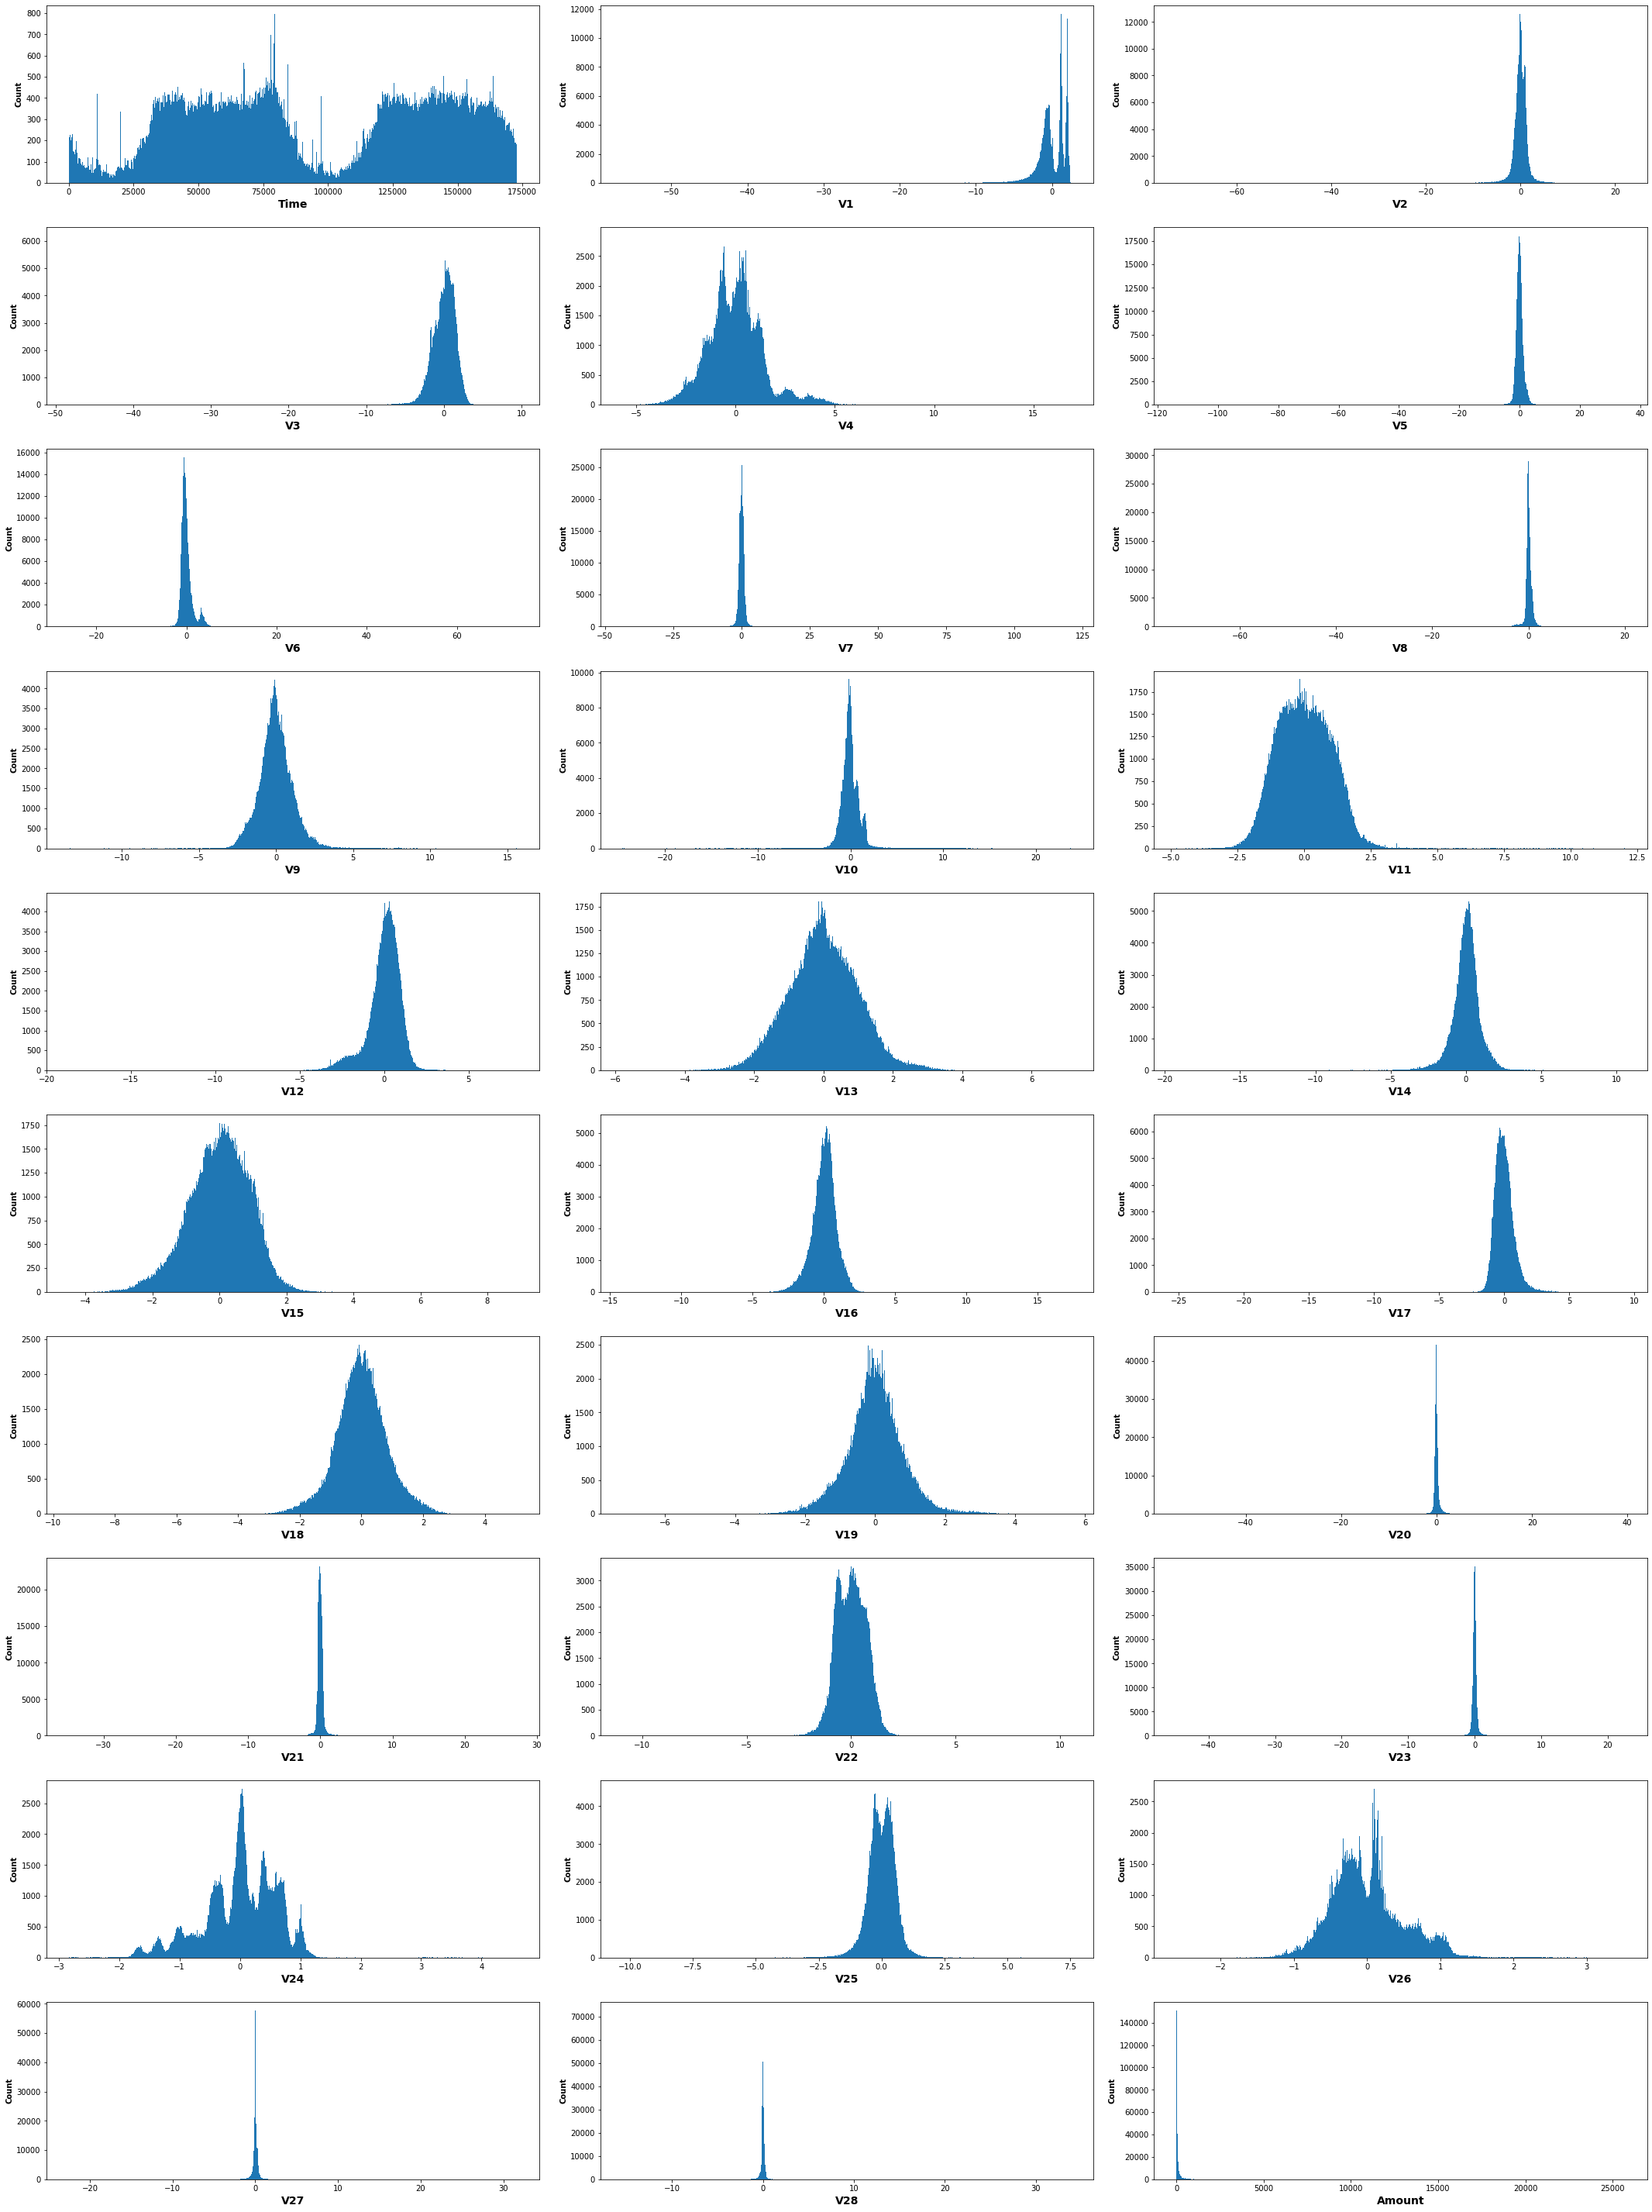

In [ ]:
fig,ax=plt.subplots(10,3,figsize=(30,40)) #Setting size of plot
ax=ax.flatten() #Reducting to 1 dimension
for i in range(len(data.columns)-1):
    ax[i].hist(data[data.columns[i]],bins=1000)
    ax[i].set_xlabel(data.columns[i],fontsize=14,fontweight='bold')
    ax[i].set_ylabel('Count',fontsize=10,fontweight='bold')
fig.tight_layout(pad=2) #Displaying plots in a concise manner
plt.plot()

In [ ]:
# We can see that all variables except Time and Amount are normally distributed hence we need to normalize time and amount.

data['Time']=(data['Time']-data['Time'].min())/(data['Time'].max()-data['Time'].min())
data['Amount']=(data['Amount']-data['Amount'].min())/(data['Amount'].max()-data['Amount'].min())

[]

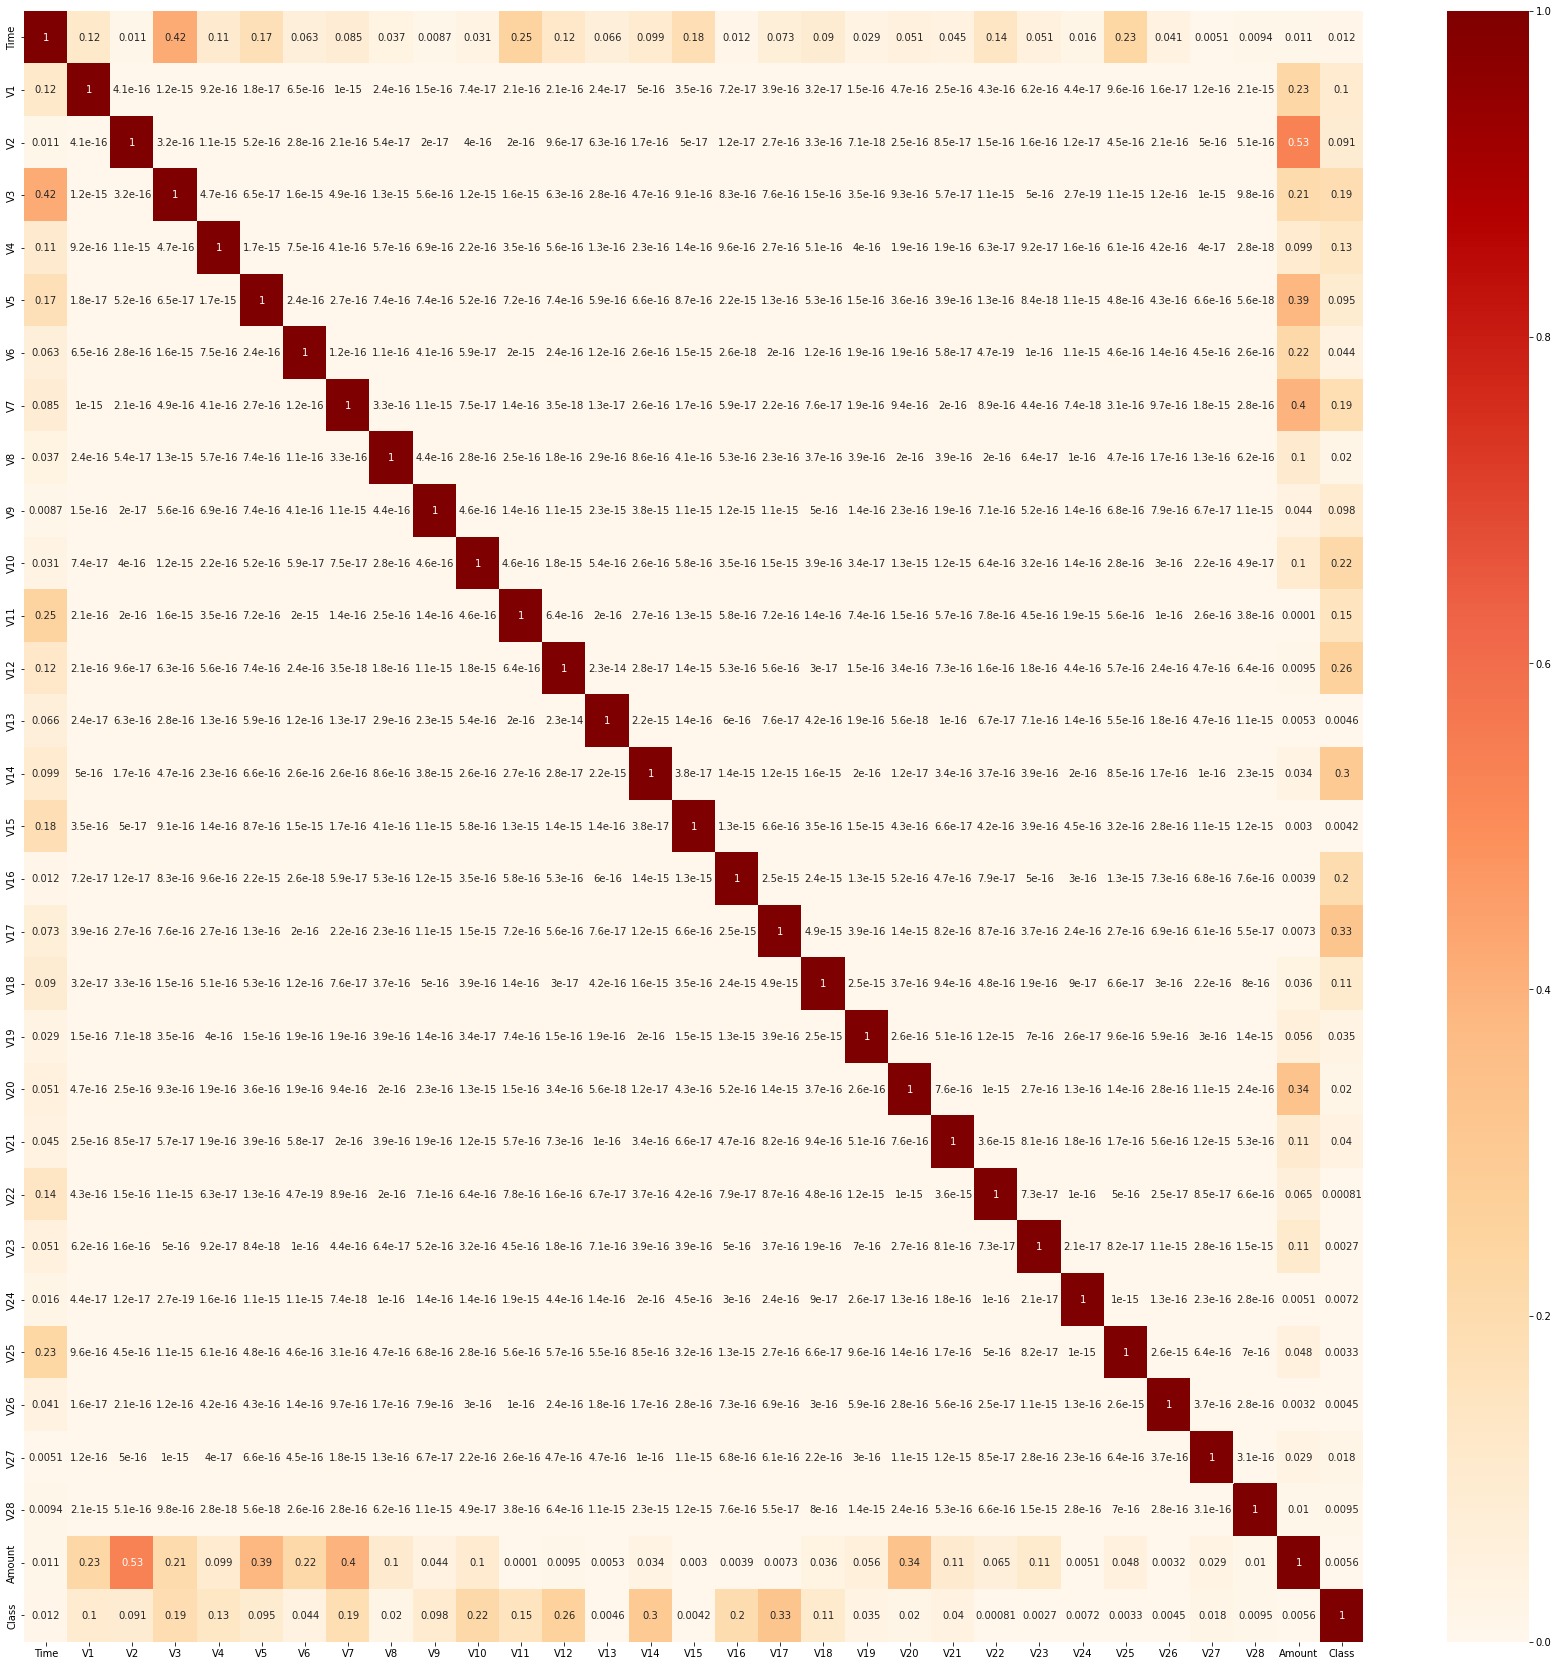

In [ ]:
corrMatrix=data.corr('pearson') #Plotting Pearson correlation coefficients for the data
plt.figure(figsize=(30,30))
sns.heatmap(abs(corrMatrix),annot=True,cmap=cm.OrRd) #Setting annotations and colormap
plt.plot()

[]

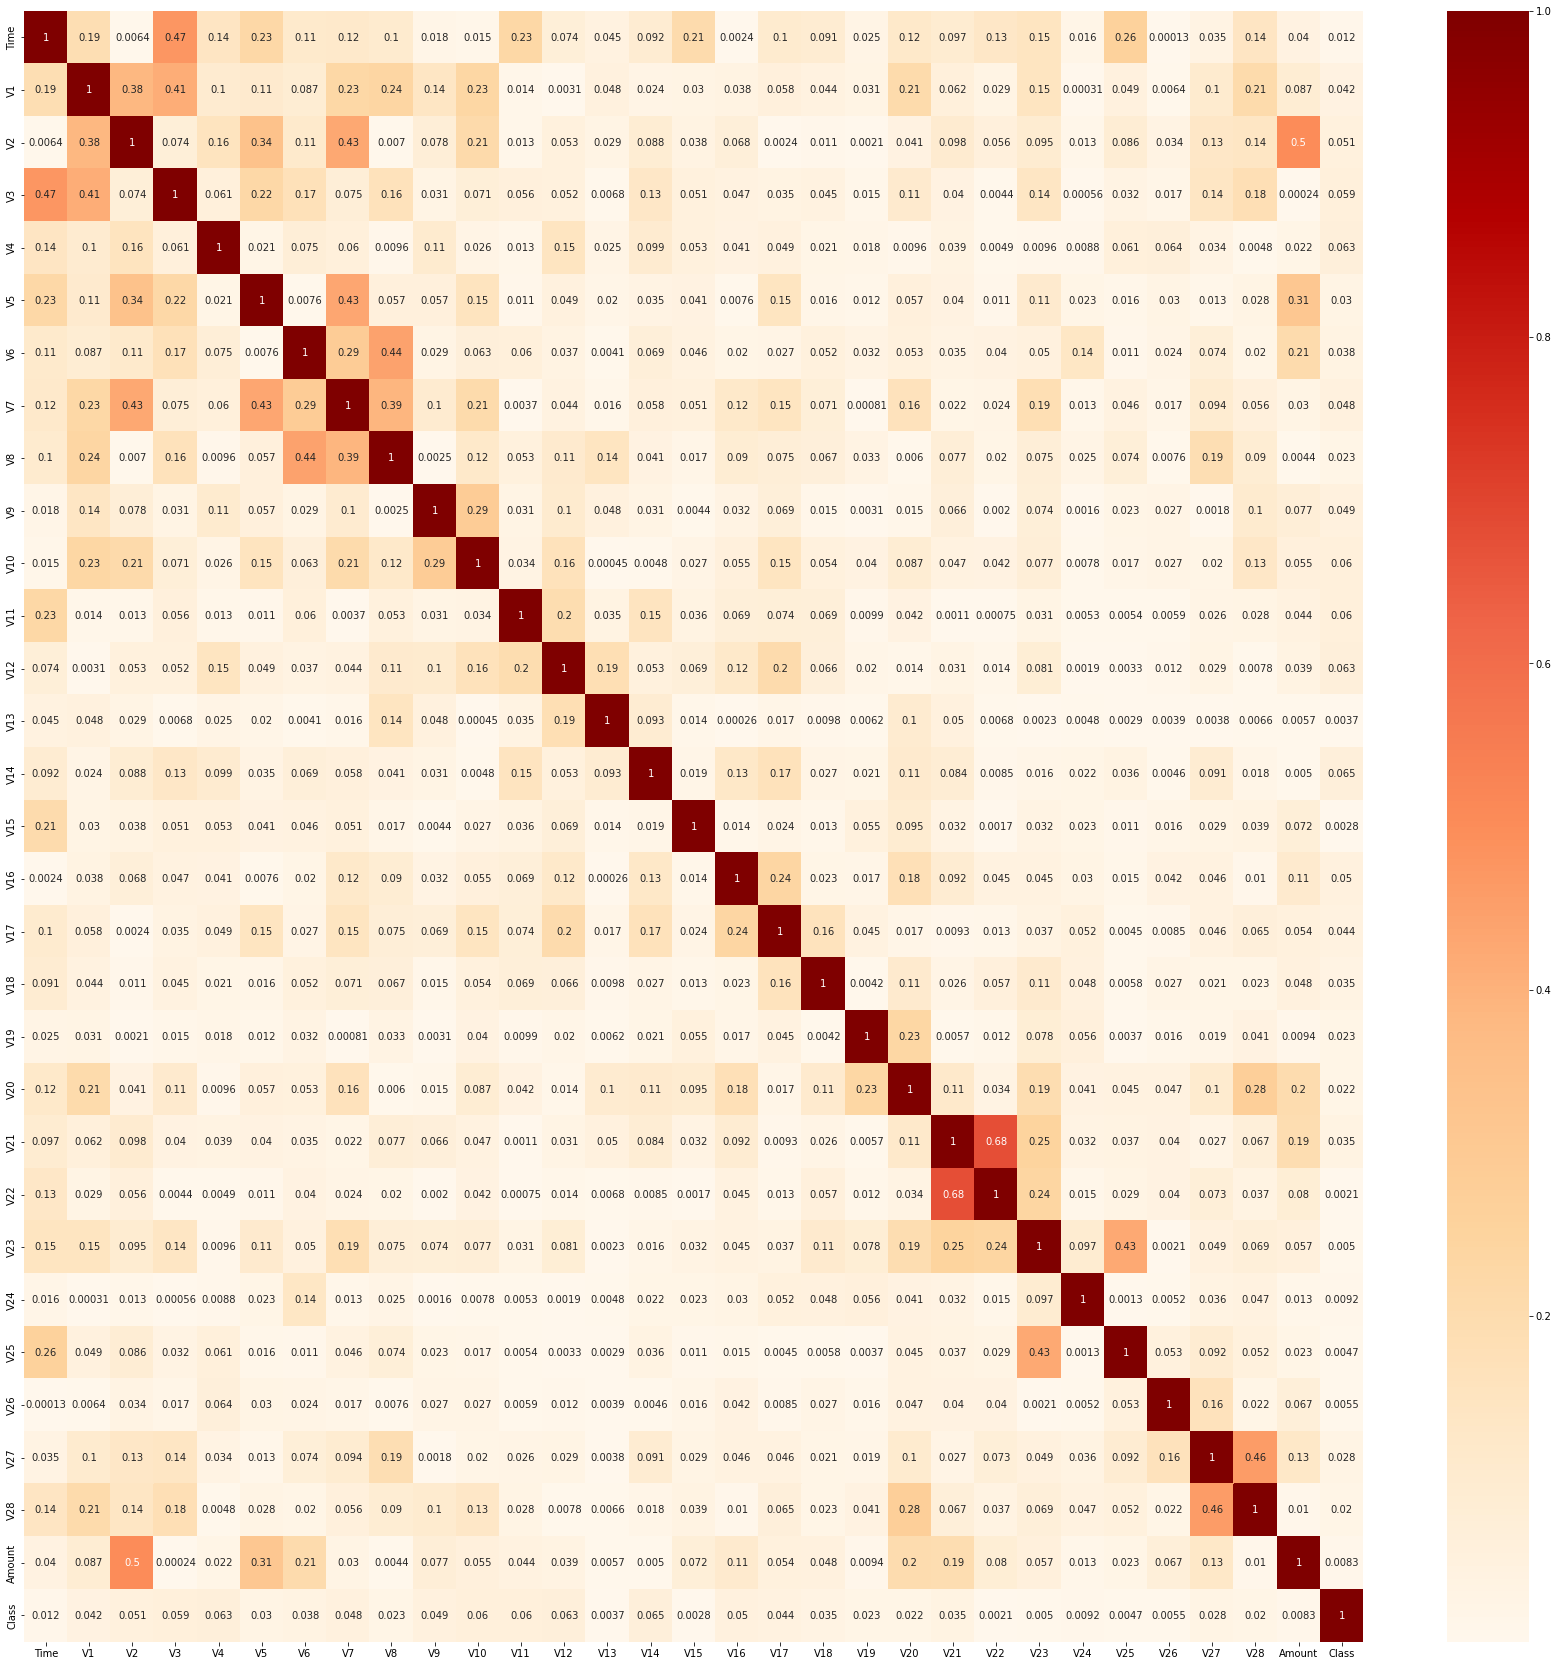

In [ ]:
corrMatrix=data.corr('spearman') #Plotting Spearman correlation coefficients for the data
plt.figure(figsize=(30,30))
sns.heatmap(abs(corrMatrix),annot=True,cmap=cm.OrRd) #Setting annotations and colormap
plt.plot()

In [ ]:
#We can see that pretty much all variables are independent of each other.

In [ ]:
X=data[data.columns[1:-2]]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif

,VIF,variable
0,1.0,V1
1,1.0,V2
2,1.0,V3
3,1.0,V4
4,1.0,V5
5,1.0,V6
6,1.0,V7
7,1.0,V8
8,1.0,V9
9,1.0,V10


In [ ]:
# Since all variables have VIF <5, all of them are usable (no multicollinearity)

# Logistic Regression


In [ ]:
X=data.drop('Class',axis=1).values
Y=data['Class'].values

In [ ]:
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,test_size=0.3,random_state=40) #splitting dataset into 70% train and 30% test

In [ ]:
model = LogisticRegression(C=0.1, random_state=0) # using a logistic regression model for classification

model.fit(xTrain, yTrain) # fitting the model to training data


LogisticRegression(C=0.1, random_state=0)

In [ ]:
model.score(xTest,yTest) # checking performance of model on test data

0.9992626663389628

In [ ]:
yPred=model.predict(xTest) # predicting fraudulence on test data using model.predict
print(classification_report(yTest,yPred))
print(f'f1 score= {f1_score(yTest,yPred)}') # printing the F1 score using test data and predicted data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85305
           1       0.88      0.63      0.73       138

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443

f1 score= 0.7341772151898734


In [ ]:
# We can see that the f1-score is only about 70%. This is mainly due to the fact that there are way less samples in fraudulent class as compared to
# non-fraudulent one. Hence the precision of detecting non-fraudulent transaction is 100% while for that of fraudulent class is only 67%.


In [ ]:
from sklearn.model_selection import GridSearchCV 


parameters = [{'penalty':['l1','l2']}, 
              {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}]

model2=LogisticRegression(random_state=0)

grid_search = GridSearchCV(estimator = model2,  
                           param_grid = parameters,
                           scoring = 'f1',
                           cv = 5,
                           verbose=0)
grid_search.fit(xTrain, yTrain) # using grid search to estimate best hyper-parameters

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid=[{'penalty': ['l1', 'l2']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             scoring='f1')

In [ ]:
grid_search.best_estimator_

LogisticRegression(random_state=0)

In [ ]:
grid_search.best_params_

{'penalty': 'l2'}

In [ ]:
grid_search.best_score_

0.7217316707085498

# Support  Vector Machine Classification

In [ ]:
model=SVC(gamma='auto',C=0.001) # using SVM classification 

model.fit(xTrain,yTrain) # using the model on training data

SVC(C=0.001, gamma='auto')

In [ ]:
model.score(xTest,yTest) # checking the score

0.9983848881710614

In [ ]:
yPred=model.predict(xTest) # prediction using model
print(classification_report(yTest,yPred))
print(f'f1 score= {f1_score(yTest,yPred)}') # checking F1 score

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85305
           1       0.00      0.00      0.00       138

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

f1 score= 0.0


In [ ]:
# This performed worse than Logistic Regression

# Random Forest Classifier

In [ ]:
model=RandomForestClassifier(max_depth=10,n_jobs=4) # using random forest classification

model.fit(xTrain,yTrain) # fitting the model on training data

In [ ]:
model.score(xTest,yTest) # checking score on test data using model

0.9996371850239341

In [ ]:
yPred=model.predict(xTest)
print(classification_report(yTest,yPred))
print(f'f1 score= {f1_score(yTest,yPred)}') # checking F1 score

In [ ]:
# Random Forest Classifier gives best results so far

# Neural Network

In [ ]:
X=data.drop('Class',axis=1).values
Y=data['Class'].values

xTrain,xTest,yTrain,yTest = train_test_split(X,Y,test_size=0.3,random_state=40)

yTrain = to_categorical(yTrain,2) # using categorical variables for training data
yTest = to_categorical(yTest,2)

model=Sequential() # using keras sequential model
model.add(Dense(50, activation='relu', input_dim=30)) # first layer with relu activation
model.add(Dense(50, activation='relu')) # second layer also with relu activation
model.add(Dense(2, activation='softmax')) # final layer with softmax activation

def get_f1(y_true, y_pred): #taken from old keras source code, to calculate f1_score
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[get_f1]) # model definition completed

In [ ]:
# build the model

model.fit(xTrain, yTrain, epochs=20) # fitting model to training data

In [ ]:
yPred=model.predict(xTest) # prediction on test data using model
scores = model.evaluate(xTest, yTest, verbose=0) # calculating accuracy of model 
yPred

2671/2671 [==============================] - 3s 1ms/step


array([[9.9999994e-01, 2.1304343e-09],
       [9.9999994e-01, 6.0405996e-16],
       [9.9999994e-01, 7.4542271e-15],
       ...,
       [9.9999118e-01, 8.7951430e-06],
       [1.0000000e+00, 5.5821454e-09],
       [9.9983311e-01, 1.6682575e-04]], dtype=float32)

In [ ]:
print(f'Accuracy on test data: {scores[1]} \n Error on test data: {1-scores[1]}')    

Accuracy on test data: 0.9994150400161743 
 Error on test data: 0.0005849599838256836


In [ ]:
# This is the best performing model ...